<a href="https://colab.research.google.com/github/1900690/drone/blob/main/panorama_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GCP設定なし

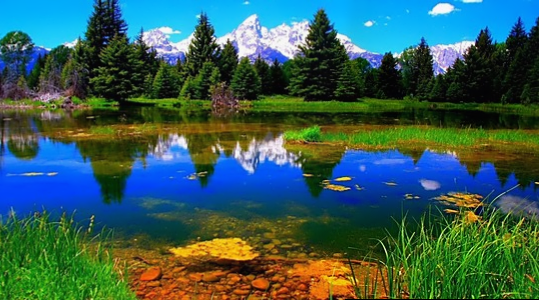

-1

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow

imgs = []
imgs.append(cv.imread('/content/migi.jpg'))
imgs.append(cv.imread('/content/hidari.jpg'))

stitcher = cv.Stitcher_create()

stitched = stitcher.stitch(imgs)[1]
cv2_imshow(stitched)
cv.waitKey(0)